<a href="https://colab.research.google.com/github/Tinapie14/exam-project/blob/main/Copia_di_DHDMCH_2025_2026_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digital Humanities e Data Management / Informatica per i Beni Culturali (2025/2026)

# Lezione 11: Caso Studio II - Analisi dei dati del dataset _Horror Movies_

## 1. Introduzione

Oggi esploriamo un dataset riguardante film horror, dal 1950 a oggi.

I dati originali sono stati estratti da *The Movie Database* attraverso la `tmdb API` utilizzando `R httr`. Per questa lezione, abbiamo utilizzato il CSV recuperato dalla repository GitHub di *TidyTuesday* (https://github.com/rfordatascience/tidytuesday/tree/main/data/2022/2022-11-01).

### 1.1. Requisiti

Effettuare un'analisi dei dati (esplorativa e esplicativa) di un dataset cinematografico.

### 1.2. Dati utilizzati

I dati in input sono costituiti da un file CSV di 4.7+ MB scaricato da una repository GitHub di TidyTuesday (https://github.com/rfordatascience/tidytuesday/tree/main/data/2022/2022-11-01).

I dati in output consistono in questo Jupyter Notebook, contenente testo e codice per l'analisi computazionale dei dati.

### 1.3. Organizzazione

I dati originali sono stati estratti da *The Movie Database* attraverso la `tmdb API` utilizzando `R httr`.

I dati in output verranno lavorati su Google Colab.

### 1.4. Documentazione

| Variabile | Tipo |	Definizione | Esempio |
| :------- | :--- | :--------- | :------ |
| id       |	int | ID del film | 	4488 |
| original_title | str | Titolo originario del film | Friday the 13th |
| title |	str |	Titolo del film |	Friday the 13th |
| original_language |	str |	Lingua originale del film |	en |
| overview | str | Descrizione del film |	Camp counselors are stalked... |
| tagline |	str | Slogan del film | They were warned... |
| release_date | date |	Data di uscita del film | 1980-05-09 |
| poster_path |	str |	Parte di URL del poster del film. Per l'URL completo bisogna concatenare "https://www.themoviedb.org/t/p/w1280" con il valore della cella |	/HzrPn1gEHWixfMOvOehOTlHROo.jpg |
| popularity | float | Punteggio di popolarità calcolato sulla base di molte altre variabili |	58.957 |
| vote_count | int | Voti totali dati al film | 2289 |
| vote_average | float | Media dei voti dati al film | 6.4 |
| budget | int | Budget del film, calcolato in dollari | 550000 |
| revenue |	int |	Entrate del film, calcolate in dollari | 59754601 |
| runtime |	int |	Durata del film, calcolata in minuti | 95 |
| status | str |	Stato del film | Released |
| genre_names |	str |	Lista di generi del film, ognuno separato dalla virgola `,` | Horror, Thriller |
| collection | int | ID della collezione | 9735 |
| collection_name |	str |	Nome della collezione |	Friday the 13th Collection |

### 1.5. Preservazione

Il dataset utilizzato in questa lezione è conservato nella repository GitHub di TidyTuesday (https://github.com/rfordatascience/tidytuesday/tree/main/data/2022/2022-11-01).

I dati in output verranno conservati nella repository Github del corso.

### 1.6. Accesso e Utilizzo

I dati di input sono rilasciati sotto licenza CC0 1.0 Universal.

Il codice è rilasciato sotto licenza CC0 1.0 Universal.

I dati di output sono rilasciati sotto licenza CC0 1.0 Universal.

## 2. Caricamento e ispezione

Come al solito:

1. importiamo Pandas;
2. creiamo il nostro DataFrame principale dal CSV;
3. studiamoci il DataFrame (nei modi che più ci aggradono).

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2022/2022-11-01/horror_movies.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32540 entries, 0 to 32539
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 32540 non-null  int64  
 1   original_title     32540 non-null  object 
 2   title              32540 non-null  object 
 3   original_language  32540 non-null  object 
 4   overview           31254 non-null  object 
 5   tagline            12706 non-null  object 
 6   release_date       32540 non-null  object 
 7   poster_path        28066 non-null  object 
 8   popularity         32540 non-null  float64
 9   vote_count         32540 non-null  int64  
 10  vote_average       32540 non-null  float64
 11  budget             32540 non-null  int64  
 12  revenue            32540 non-null  int64  
 13  runtime            32540 non-null  int64  
 14  status             32540 non-null  object 
 15  adult              32540 non-null  bool   
 16  backdrop_path      135

In [ ]:
df.head()

,id,original_title,title,original_language,overview,tagline,release_date,poster_path,popularity,vote_count,vote_average,budget,revenue,runtime,status,adult,backdrop_path,genre_names,collection,collection_name
0,760161,Orphan: First Kill,Orphan: First Kill,en,After escaping from an Estonian psychiatric fa...,There's always been something wrong with Esther.,2022-07-27,/pHkKbIRoCe7zIFvqan9LFSaQAde.jpg,5088.584,902,6.9,0,9572765,99,Released,False,/5GA3vV1aWWHTSDO5eno8V5zDo8r.jpg,"Horror, Thriller",760193.0,Orphan Collection
1,760741,Beast,Beast,en,A recently widowed man and his two teenage dau...,Fight for family.,2022-08-11,/xIGr7UHsKf0URWmyyd5qFMAq4d8.jpg,2172.338,584,7.1,0,56000000,93,Released,False,/2k9tBql5GYH328Krj66tDT9LtFZ.jpg,"Adventure, Drama, Horror",NaN,NaN
2,882598,Smile,Smile,en,"After witnessing a bizarre, traumatic incident...","Once you see it, it’s too late.",2022-09-23,/hiaeZKzwsk4y4atFhmncO5KRxeT.jpg,1863.628,114,6.8,17000000,45000000,115,Released,False,/mVNPfpydornVe4H4UCIk7WevWjf.jpg,"Horror, Mystery, Thriller",NaN,NaN
3,756999,The Black Phone,The Black Phone,en,"Finney Blake, a shy but clever 13-year-old boy...",Never talk to strangers.,2022-06-22,/lr11mCT85T1JanlgjMuhs9nMht4.jpg,1071.398,2736,7.9,18800000,161000000,103,Released,False,/AfvIjhDu9p64jKcmohS4hsPG95Q.jpg,"Horror, Thriller",NaN,NaN
4,772450,Presencias,Presences,es,A man who loses his wife and goes to seclude h...,NaN,2022-09-07,/dgDT3uol3mdvwEg0jt1ble3l9hw.jpg,1020.995,83,7.0,0,0,0,Released,False,/ojfzhdwRemcDt1I6pao6vVLw9AA.jpg,Horror,NaN,NaN


## 3. Processamento

Procediamo con la bonifica dei dati. Non siamo messi poi così male: il dataset è fatto bene ed è molto ben popolato.

Ciononostante, ha le sue stranezze:
* gli `id` sono `int` (ma vabbé, non è la fine del mondo);
* le `release_date` sono `object` (dovrebbero invece essere `datetime`, un tipo di dati specifico per le date);
* alcuni `budget`, `revenue` e `runtime` sono pari a `0` (decisamente impossibile);
* le `collection` sono `float` (dovrebbero essere invece `int` oppure, meglio, `str`);
* ci sono probabilmente altre cose che possono emergere mentre lavoriamo.

Iniziamo con le date.

Pandas ci permette la conversione in date in vari modi. Noi utilizzeremo il classico `.astype()`, passando come argomento `"datetime64[ns]"`.

In [ ]:
df['release_date']

,release_date
0,2022-07-27
1,2022-08-11
2,2022-09-23
3,2022-06-22
4,2022-09-07
...,...
32535,2021-11-20
32536,2006-10-30
32537,2022-07-22
32538,2022-12-15


In [ ]:
df['release_date'] = df['release_date'].astype("datetime64[ns]")


In [ ]:
df['release_date']

,release_date
0,2022-07-27
1,2022-08-11
2,2022-09-23
3,2022-06-22
4,2022-09-07
...,...
32535,2021-11-20
32536,2006-10-30
32537,2022-07-22
32538,2022-12-15


Perché convertire le date in `datetime`? A volte in effetti potrebbe non essere utile, e potrebbe bastare averle come stringhe o come numeri. Però, proprio come le stringhe e i numeri, i `datetime` hanno le loro operaizoni e metodi particolari.

Per esempio, una volta che una data è un `datetime`, possiamo estrarre molto facilmente l'anno tramite `.dt.year`.

Creiamo una nuova colonna nel nostro dataframe chiamata `year` e la popoliamo con i soli anni di uscita dei film.

In [ ]:
df['year'] = df['release_date'].dt.year

In [ ]:
df['year']

,year
0,2022
1,2022
2,2022
3,2022
4,2022
...,...
32535,2021
32536,2006
32537,2022
32538,2022


Un'altra questione da gestire sono i valori tipo `budget` pari a `0`. Lo faremo più avanti. Nel frattempo, ricordiamoci di questa cosa.

## 4. Exploratory Data Analysis

Sulla scia della bonifica dei dati, proviamo ad esplorare il dataset un po' più nel dettaglio, e nel frattempo iniziamo a farci domande.

Per esempio, possiamo provare a vedere se ci sono distribuzioni bizzarre nelle colonne con i dati quantitativi.

In [ ]:
df.describe()

,id,release_date,popularity,vote_count,vote_average,budget,revenue,runtime,collection,year
count,3.254000e+04,32540,32540.000000,32540.000000,32540.000000,3.254000e+04,3.254000e+04,32540.000000,2.306000e+03,32540.00000
mean,4.459108e+05,2007-02-18 17:59:12.206515200,4.013456,62.691487,3.335728,5.431266e+05,1.349747e+06,62.142901,4.815349e+05,2006.65504
min,1.700000e+01,1950-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,6.560000e+02,1950.00000
25%,1.464948e+05,2000-10-20 18:00:00,0.600000,0.000000,0.000000,0.000000e+00,0.000000e+00,14.000000,1.554210e+05,2000.00000
50%,4.265210e+05,2012-12-09 00:00:00,0.840000,2.000000,4.000000,0.000000e+00,0.000000e+00,80.000000,4.712590e+05,2012.00000
75%,7.075340e+05,2018-10-03 00:00:00,2.243250,11.000000,5.700000,0.000000e+00,0.000000e+00,91.000000,7.590672e+05,2018.00000
max,1.033095e+06,2022-12-31 00:00:00,5088.584000,16900.000000,10.000000,2.000000e+08,7.018426e+08,683.000000,1.033032e+06,2022.00000
std,3.057447e+05,NaN,37.513472,420.887474,2.876002,4.542668e+06,1.443048e+07,40.998527,3.244982e+05,15.48874


Come anticipato, `budget` e `revenue` hanno molti valori pari a `0`. Se ne avremo bisogno, li gestiremo.

Un dato bizzarro che potrebbe sfuggire è quello stranissimo `683.000000`, che è stato inviduato come il valore più alto presente nella colonna `runtime`. In effetti un film di 683 minuti è qualcosa di molto sospetto.

_Non è impossibile_, dato che esistono film ben più lunghi o dalla durata simile (e.g. [_Resan_](https://en.wikipedia.org/wiki/Resan), [_La flor_](https://en.wikipedia.org/wiki/La_flor), ecc.), ma è poco probabile che sia corretto. Controlliamo.

In [ ]:
df[df["runtime"] == 683]

Se andiamo a vedere online, [Machine Learning](https://www.themoviedb.org/movie/898555-machine-learning) è un cortometraggio di 11 minuti.

Chissà da dove arriva quel 683...

Magari il film dura effettivamente 11 minuti e 23 secondi?
    
    11 minuti * 60 secondi + 23 secondi = 660 + 23 = 683 secondi
    
Chi ha inserito quel dato nel database originale ha inserito la durata in secondi invece che in minuti come richiesto.

Correggiamolo con `.loc[]`. Usiamo l'indice della riga incriminata (`30659`) e il nome della colonna interessata (`runtime`) per accedere alla cella con il valore sbagliato, e assegnamo il nuovo valore `11`.

In [ ]:
df.loc[30659, "runtime"] = 11

In [ ]:
print(df.loc[30659]["runtime"])

11


Esistono casi simili?

In [ ]:
film_sospettosamente_lunghi = df[df['runtime'] > 300]
film_sospettosamente_lunghi[['title', 'runtime', 'year']].sort_values(by='runtime', ascending=False)

,title,runtime,year
13288,Broken Saints,626,2001
4174,Kingdom Hospital,608,2004
7956,DAU. Degeneration,369,2020
4740,The Guyver: Bio-Booster Armor,360,1989
21298,Hell Girl,360,2006
9062,Les Compagnons de Baal,350,1968
15835,The Dark Side,336,2019
21452,Living in Bondage,320,1992


Sono quasi tutte serie oppure film in più episodi, il che spiega la durata molto alta.

### 4.1. Il boom dell'horror

Ora, proviamo ad andare più nel dettaglio nel dominio di oggi: il cinema horror.

Se avete fatto attenzione, negli ultimi anni, è stata percepita una crescita esponenziale del cinema horror nelle sale e nelle piattaforme streaming.

Riusciamo a verificare questa cosa?

Prendiamo la nuova colonna `year`, contiamo i valori (quindi i film per ogni anno), e poi utilizziamo il metodo `.sort_index()` per riordinare i risultati sulla base dell'indice (che nel conteggio generato è costituito dagli anni).

In [ ]:
df['year'].value_counts().sort_index()

,count
year,
1950,8
1951,15
1952,11
1953,22
1954,27
...,...
2018,1771
2019,1895
2020,2100


Proviamo a visualizzarlo in un **grafo a linea** (_line chart_).

In Pandas, lo generiamo tramite `.plot.line()`.

<Axes: title={'center': "L'horror è stato quasi sempre in crescita costante"}, xlabel='year'>

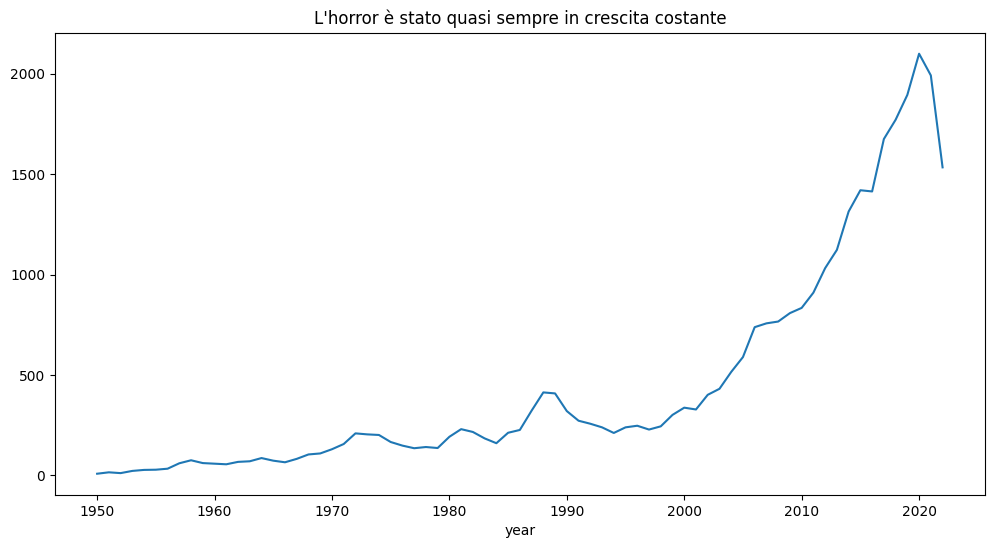

In [ ]:
df['year'].value_counts().sort_index().plot.line(
    title="L'horror è stato quasi sempre in crescita costante",
    figsize=(12,6)
    )

L'ultima depressione potrebbe essere dovuta, banalmente, alla più generale crisi determinata dall'epidemia COVID.

### 4.2. I sottogeneri dell'horror

Un altro aspetto interessante dell'horror è la sua capacità di mescolarsi in maniera inedita con altri generi e sottogeneri anche molto lontani tra loro, generando prodotti inediti.

Vediamo i generi in `genre_names`. Sono elencati in stringhe dove ogni genere è separato dalla virgola `,`.

Come abbiamo già visto, possiamo utilizzare `.split()` ed `.explode()` per gestire questo tipo di informazioni. Usiamo `.value_counts()` per contare i film per ogni genere.

Una mossa intelligente sarebbe droppare `"Horror"`, dato che è un valore troppo ovvio (a noi ci interessano gli altri generi). Lo possiamo fare usando `.drop()` e passando come argomento il valore che desideriamo eliminare dal conteggio.

In [ ]:
df['genre_names'].str.split(', ').explode().value_counts().drop('Horror')

,count
genre_names,
Thriller,7680
Comedy,4963
Drama,4271
Mystery,3138
Science Fiction,2714
Fantasy,2195
Action,1966
Crime,1153
Animation,973


Visualizziamo usando un grafico a barre orizzontali.

<Axes: ylabel='genre_names'>

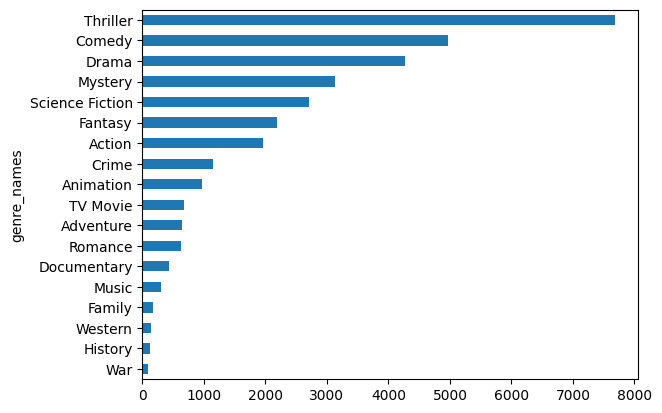

In [ ]:
df['genre_names'].str.split(', ').explode().value_counts().drop('Horror').sort_values().plot.barh()

Anche questo è un aspetto che potenzialmente ci potrebbe interessare. Oppure no. Dipende!

### 4.3. Gli aspetti finanziari dell'horror

I film sono opere d'arte, ma sono anche prodotti destinati al consumo da parte del pubblico di massa. La loro vita e la loro morte è determinata anche dal successo che ottengono al box office.

Nel dataset abbiamo due informazioni fondamentali da questo punto di vista: `budget` e `revenue`.

Ma sappiamo anche che in molte righe questi dati mancano (hanno come valore `0`, che realisticamente non è una vera quantità ma un modo per indicare un valore nullo o comunque un'incertezza).

In [ ]:
df[["budget", "revenue"]]

,budget,revenue
0,0,9572765
1,0,56000000
2,17000000,45000000
3,18800000,161000000
4,0,0
...,...,...
32535,0,0
32536,0,0
32537,0,0
32538,0,0


Proviamo a filtrare fuori questi valori sballati. Non cancelliamo né modifichiamo: invece, creiamo un nuovo DataFrame contenente i dati che ci interessano: tutti i film che hanno `budget` E `revenue` maggiori di 0.

In [ ]:
financial_df = df[(df['budget'] > 0) & (df['revenue'] > 0)]

In [ ]:
print(f"Film totali: {len(df)}")
print(f"Film con dati finanziari completi: {len(financial_df)}")

Film totali: 32540
Film con dati finanziari completi: 1098


Pochissimi film hanno dati finanziari completi.

In [ ]:
financial_df

,id,original_title,title,original_language,overview,tagline,release_date,poster_path,popularity,vote_count,...,budget,revenue,runtime,status,adult,backdrop_path,genre_names,collection,collection_name,year
2,882598,Smile,Smile,en,"After witnessing a bizarre, traumatic incident...","Once you see it, it’s too late.",2022-09-23,/hiaeZKzwsk4y4atFhmncO5KRxeT.jpg,1863.628,114,...,17000000,45000000,115,Released,False,/mVNPfpydornVe4H4UCIk7WevWjf.jpg,"Horror, Mystery, Thriller",NaN,NaN,2022
3,756999,The Black Phone,The Black Phone,en,"Finney Blake, a shy but clever 13-year-old boy...",Never talk to strangers.,2022-06-22,/lr11mCT85T1JanlgjMuhs9nMht4.jpg,1071.398,2736,...,18800000,161000000,103,Released,False,/AfvIjhDu9p64jKcmohS4hsPG95Q.jpg,"Horror, Thriller",NaN,NaN,2022
6,717728,Jeepers Creepers: Reborn,Jeepers Creepers: Reborn,en,Forced to travel with her boyfriend to a horro...,Evil Rides Again,2022-09-15,/aGBuiirBIQ7o64FmJxO53eYDuro.jpg,821.605,125,...,20000000,2892594,88,Released,False,/tIX6j3NzadlwGcJ52nuWdmtOQkg.jpg,"Horror, Mystery, Thriller",94899.0,Jeepers Creepers Collection,2022
7,762504,Nope,Nope,en,Residents in a lonely gulch of inland Californ...,What’s a bad miracle?,2022-07-20,/AcKVlWaNVVVFQwro3nLXqPljcYA.jpg,733.112,1684,...,68000000,170800000,130,Released,False,/xVbppM1xgbskOKgOuV8fbWBWHtt.jpg,"Horror, Mystery, Science Fiction, Thriller",NaN,NaN,2022
9,760104,X,X,en,"In 1979, a group of young filmmakers set out t...",Dying to show you a good time.,2022-03-17,/woTQx9Q4b8aO13jR9dsj8C9JESy.jpg,543.670,1035,...,10000000,14257609,106,Released,False,/21ldFAokKVjwzi1SHXoPb5gc7md.jpg,"Horror, Mystery, Thriller",950289.0,X Collection,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32328,1015126,Routs,Routs,es,NaN,NaN,2022-08-20,/aZXVFcYD64DDpfQRfBIX6mlZIrE.jpg,0.600,0,...,25000,50000000,0,Released,False,/bGO11zcuw7UrKMl5eDEurby7xgx.jpg,"Horror, Thriller",NaN,NaN,2022
32382,1020263,I,I,en,The First Release,I,2021-09-09,/q2sq8lQpcj4KZyIyIOJ9uPpXoHd.jpg,0.600,1,...,1,2,1,Released,False,/kPSbud5rNYLuwuRI8sDSYQ4hVO3.jpg,"Horror, Mystery",NaN,NaN,2021
32383,1020264,II,II,en,The Second Release,II,2021-09-09,/w7BgNPU9RxgcsYvqVga9PBiUCNn.jpg,0.600,1,...,1,2,2,Released,False,/cH72e3R01LV5JPhIAuGcetuwswj.jpg,"Horror, Mystery",NaN,NaN,2021
32384,1020266,III,III,en,The Third Release,III,2021-11-02,/wO1dHtGiLbl0ZusCKt0iftFJbC5.jpg,0.600,1,...,1,3,3,Released,False,/1vD28mht01Ypw9SRr57GpRtCMy1.jpg,"Horror, Mystery",NaN,NaN,2021


In [ ]:
financial_df[["budget", "revenue"]]

,budget,revenue
2,17000000,45000000
3,18800000,161000000
6,20000000,2892594
7,68000000,170800000
9,10000000,14257609
...,...,...
32328,25000,50000000
32382,1,2
32383,1,2
32384,1,3


Ci sono altri dati molto strani. Vediamoli meglio. Alcuni film hanno come `budget` e `revenue` dei numeri impossibili, tipo `1`, `2`, `3`, `10`, `100`.

Potrebbero esserci mille motivi per valori di questo tipo. Si tratta comunque di errori di data entry da parte di qualcuno. In particolare, focalizziamoci sul `budget` (che è molto più facile da giudicare se realistico o meno).

Se guardiamo online, scopriremo che, se parliamo di **micro-budget**, un film costa _almeno_ 3000 dollari (il minimo del minimo storico, raggiunto da _The Magician_) o, più probabilmente, _almeno_ 7000 dollari (il budget di _El Mariachi_ e _Primer_).

Usiamo la soglia di 7000 per filtrare ulteriormente i film che hanno un budget realistico.

In [ ]:
financial_df2 = financial_df[(financial_df["budget"] > 7000)]

In [ ]:
financial_df2[["budget", "revenue"]]

,budget,revenue
2,17000000,45000000
3,18800000,161000000
6,20000000,2892594
7,68000000,170800000
9,10000000,14257609
...,...,...
30399,75000,80000
30404,10000,10000
31393,12000000,342322
31531,10000,10000


Ora, dato che stiamo lavorando con numeri molto grossi, può essere molto confusionario lavorare e visualizzare dati.

Una mossa intelligente potrebbe essere quella di scalare i dati. Per esempio, proviamo a scalare in milioni, dividendo `budget` e `revenue` per un milione. Creiamo due nuove colonne per contenere i risultati di questo calcolo.

In [ ]:
financial_df2["budget_m"] = financial_df2["budget"] / 1000000
financial_df2["revenue_m"] = financial_df2["revenue"] / 1000000

/tmp/ipython-input-186295517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  financial_df2["budget_m"] = financial_df2["budget"] / 1000000
/tmp/ipython-input-186295517.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  financial_df2["revenue_m"] = financial_df2["revenue"] / 1000000


In [ ]:
financial_df2[['budget_m', 'revenue_m']]

,budget_m,revenue_m
2,17.000,45.000000
3,18.800,161.000000
6,20.000,2.892594
7,68.000,170.800000
9,10.000,14.257609
...,...,...
30399,0.075,0.080000
30404,0.010,0.010000
31393,12.000,0.342322
31531,0.010,0.010000


<Axes: xlabel='budget_m', ylabel='revenue_m'>

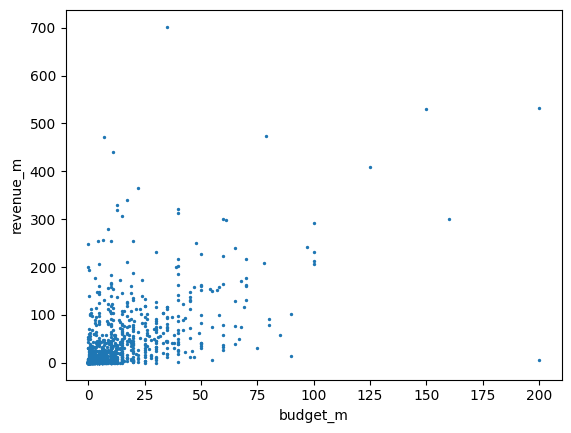

In [ ]:
financial_df2.plot.scatter(x="budget_m", y="revenue_m", s=2)

Per sicurezza e curiosità, proviamo a fare un check veloce degli outlier più estremi.

In [ ]:
financial_df2.loc[financial_df2["revenue_m"] > 700]

,id,original_title,title,original_language,overview,tagline,release_date,poster_path,popularity,vote_count,...,runtime,status,adult,backdrop_path,genre_names,collection,collection_name,year,budget_m,revenue_m
105,346364,It,It,en,"In a small town in Maine, seven children known...",Your fears are unleashed,2017-09-06,/9E2y5Q7WlCVNEhP5GiVTjhEhx1o.jpg,106.786,16900,...,135,Released,False,/tcheoA2nPATCm2vvXw2hVQoaEFD.jpg,"Fantasy, Horror",477962.0,It Collection,2017,35.0,701.842551


In [ ]:
financial_df2.loc[financial_df2["budget_m"] > 190]

,id,original_title,title,original_language,overview,tagline,release_date,poster_path,popularity,vote_count,...,runtime,status,adult,backdrop_path,genre_names,collection,collection_name,year,budget_m,revenue_m
78,72190,World War Z,World War Z,en,Life for former United Nations investigator Ge...,Remember Philly!,2013-06-20,/1SWBSYJsnyhdNRfLI1T6RsCxAQ4.jpg,131.399,13440,...,116,Released,False,/zxpEFyKDxaU8kjMB3vWao7B5V2p.jpg,"Action, Drama, Horror, Science Fiction, Thriller",NaN,NaN,2013,200.0,531.865000
11881,541526,Messengers,Messengers,en,Dr. Sarah Chapel returns to the small town of ...,NaN,2004-06-27,/eu5Dko9VIqmUYppeHBuSo0as8er.jpg,1.400,1,...,96,Released,False,NaN,"Drama, Horror, Science Fiction",NaN,NaN,2004,200.0,5.224221


## 5. Analisi esplicativa

Passiamo alla nostra narrativa. Ci focalizzeremo sulla questione legata all'aumento della produzione di film horror nel corso del tempo.

### 5.1. Perché tutti si sono messi a fare film horror?

Supponiamo c'entri qualcosa l'aspetto economico.

Possiamo capire facilmente quanto un film abbia effettivamente guadagnato calcolando il suo **Ritorno sull'Investimento** (**ROI**).

Si intuisce facilmente come calcolarlo (è nel nome):

> `ROI` = `ritorno_economico` : `spesa`

Nel nostro caso:

> `ROI` = `revenue` : `budget`

Creiamo una nuova colonna `roi` nella quale calcoliamo il ROI per ogni film.

In [ ]:
financial_df2['roi'] = financial_df['revenue'] / financial_df['budget']

/tmp/ipython-input-2737130588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  financial_df2['roi'] = financial_df['revenue'] / financial_df['budget']


Controlliamo. Il significato del ROI è: per ogni dollaro speso, è la quantità guadagnata. Quindi, per esempio, per ogni dollaro speso per _The Black Phone_, sono stati guadagnati 8.56 dollari.

In [ ]:
financial_df2[["original_title", 'roi', 'year']]

,original_title,roi,year
2,Smile,2.647059,2022
3,The Black Phone,8.563830,2022
6,Jeepers Creepers: Reborn,0.144630,2022
7,Nope,2.511765,2022
9,X,1.425761,2022
...,...,...,...
30399,ষড়রিপু ১,1.066667,2016
30404,"Estremecer, Lejos de ti.",1.000000,2018
31393,Guinness Guru,0.028527,2022
31531,It Ends With A Knife,1.000000,2020


Riordiniamo i film per `roi` e aggiungiamo il resto dei dati.

In [ ]:
financial_df2[["title", 'roi', 'budget', 'revenue', 'budget_m', 'revenue_m', 'year']].sort_values(by="roi", ascending=False).head(10)

,title,roi,budget,revenue,budget_m,revenue_m,year
1686,One Cut of the Dead,6666.666667,30000,200000000,0.030,200.000000,2017
330,The Blair Witch Project,4143.984983,60000,248639099,0.060,248.639099,1999
32328,Routs,2000.000000,25000,50000000,0.025,50.000000,2022
173,Paranormal Activity,903.176902,215000,194183034,0.215,194.183034,2007
4565,Lady Frankenstein,698.415000,200000,139683000,0.200,139.683000,1971
945,The Gallows,426.644100,100000,42664410,0.100,42.664410,2015
918,Open Water,420.522723,130000,54667954,0.130,54.667954,2004
245,The Texas Chain Saw Massacre,363.529412,85000,30900000,0.085,30.900000,1974
676,Night of the Living Dead,263.157895,114000,30000000,0.114,30.000000,1968
101,Halloween,216.227692,325000,70274000,0.325,70.274000,1978


Iniziamo a visualizzare qualcosa.

Usiamo un grafo di dispersione per vedere la relazione tra `revenue_m`, `budget_m` e `roi`. Per esprimere visivamente il `roi`, utilizziamo sia il colore (`c`) che la grandezza (`s`) dei punti nel grafico.

Text(0, 0.5, 'Budget (in milioni di dollari)')

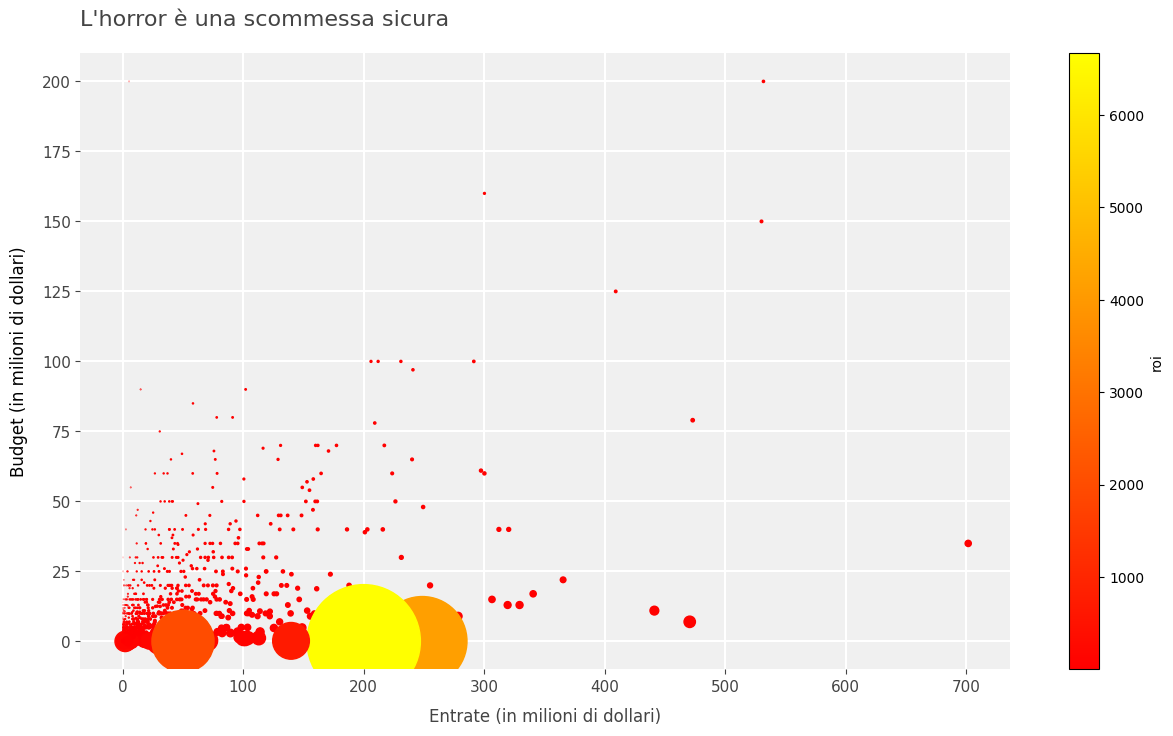

In [ ]:
ax = financial_df2.plot.scatter(
    x="revenue_m",
    y="budget_m",
    c="roi",
    s="roi",
    cmap="autumn",
    figsize=(15,8)
)

ax.set_facecolor('#f0f0f0')
ax.grid(color='white', linewidth=1.5)
ax.set_axisbelow(True)
for bordo in ax.spines.values():
    bordo.set_visible(False)
colore_testo = '#444444'
ax.set_title("L'horror è una scommessa sicura",
             loc="left",
             pad=20,
             fontsize=16,
             color=colore_testo)
ax.tick_params(colors=colore_testo, labelsize=11)
ax.xaxis.label.set_color(colore_testo)
ax.set_xlabel("Entrate (in milioni di dollari)", fontsize=12, labelpad=10)
ax.set_ylabel("Budget (in milioni di dollari)", fontsize=12, labelpad=10)

In altre parole, l'horror è un genere che permette guadagni enormi (ROI) anche con budget ridicoli.

Ma proviamo a verificare se questa tendenza in generale è stata ed è tutt'ora vera.

Proviamo a vederlo per decennio.

Creiamo una nuova colonna `decade` da popolare con il risultato di un veloce calcolo matematico applicato su `year`:
* prima facciamo una divisione _floor_ su `year` per 10: questo, per esempio, trasforma `1987` in `198`;
* poi moltiplichiamo per 10: per esempio, `198` diventa `1980`.

In [ ]:
financial_df2['decade'] = (financial_df2['year'] // 10) * 10

Ora possiamo calcolare il ROI medio per decade. Usiamo un `.groupby()` per raggruppare i dati per `decade`, ci focalizziamo sul `roi` e su questo calcoliamo la media con `.mean()`.

In [ ]:
financial_df2.groupby('decade')['roi'].mean()

Visualizziamo i dati usando un grafico a barre.

In [ ]:
ax = financial_df2.groupby('decade')['roi'].mean().plot.bar(
    color=['#C1D5DC', '#C1D5DC', '#AB0000',
           '#C1D5DC', '#AB0000', '#C1D5DC',
           '#C1D5DC', '#AB0000'],
    figsize=(15,7)
    )

ax.set_facecolor('#f0f0f0')
ax.grid(color='white', linewidth=1.5)
ax.set_axisbelow(True)
for bordo in ax.spines.values():
    bordo.set_visible(False)
colore_testo = '#444444'
ax.set_title("Il modello produttivo per gli horror è cambiato",
             loc="left",
             pad=20,
             fontsize=16,
             color=colore_testo)
ax.tick_params(colors=colore_testo, labelsize=11)
ax.xaxis.label.set_color(colore_testo)
ax.set_xlabel("")
ax.set_ylabel("ROI medio", fontsize=12, labelpad=10)

Negli anni '70 l'horror era "nuovo" e rischioso. Ne facevano pochi, costavano niente (es. Halloween, Texas Chainsaw) e incassavano milioni.

Negli anni '80 l'horror diventa moda. Gli studios buttano soldi nel genere, i budget si alzano (più effetti speciali, trucco, star), ma il pubblico si divide su troppi film.

Negli anni '90 abbiamo _The Blair Witch Project_, uno dei ROI più assurdi nella storia del cinema.

Perché negli anni 2000 si riabbassa? In quel decennio Hollywood ha smesso di rischiare e ha iniziato a produrre remake ad alto budget: *The Ring*, *The Grudge*, *Texas Chainsaw Massacre*, *Dawn of the Dead*. Film che incassavano bene, ma costavano molto.

La risalita finale è interessante. Blumhouse e A24 hanno industrializzato il metodo di produzione di film a basso budget, con libertà creativa totale e distribuzione globale. Film come *Get Out*, *Insidious* o *Smile* costano poco e rendono tantissimo, riportando la curva verso l'alto in modo sistematico.

In [ ]:
idx_max_roi = financial_df2.groupby('decade')['roi'].idxmax()

In [ ]:
champions = financial_df2.loc[idx_max_roi][['decade', 'title', 'budget', 'revenue', 'roi']]

In [ ]:
print(champions.sort_values(by='decade'))

## 6. Possibili analisi ulteriori

### 6.1. Horror senza frontiere

L'horror è sempre stato dominato da Hollywood, ma negli ultimi anni piattaforme come Netflix hanno globalizzato questo genere (pensiamo al successo dei prodotti coreani o spagnoli). È vero che il monopolio anglofono sta crollando?

Dati coinvolti: `original_language`, `year`, `popularity`...

Visualizzazioni: `pie`, `bar`, ...

### 6.2. Horror fra durata e qualità

C'è il pregiudizio che l'horror sia un genere "basso", fatto di film brevi e sbrigativi per teenager. Al contrario, l'horror d'autore ("Elevated Horror" come *Midsommar* o *Barbarian*) punta su durate lunghe e ritmi lenti. I dati confermano che i film più lunghi sono giudicati meglio dal pubblico?

Dati coinvolti: `runtime`, `vote_average`, `vote_count`...

Visualizzazioni: `hist`, `scatter`, ...

## 7. Ora tocca a voi

In [ ]:
df.info()